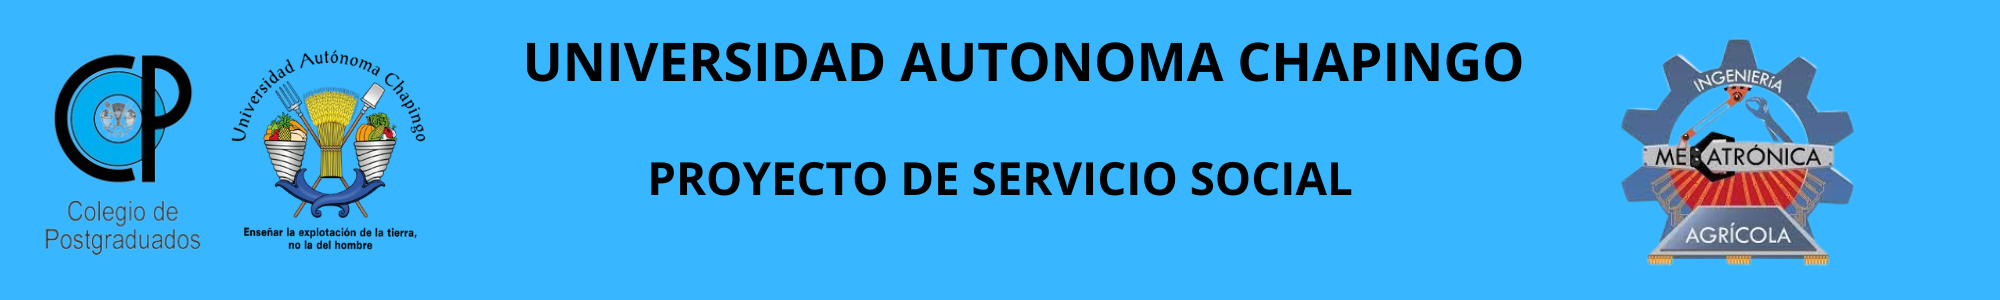

# <div style= 'text-align: center ;font-family: times-new-roman; color: #002060;'>Aplicacion de algoritmos de segmentacion y cluster en imagenes agricolas, mediante el uso de herramientas de computo </div>

><h2> <div style= 'text-align: center ;font-family: times-new-roman; color: #002060;'>MODULO 3: AGRUPAMIENTO DE PIXELES  <br>
>AUTOR: LOPEZ ESTEBAN MIGUEL <br>
>FECHA: 16 DE JULIO DEL 2024</div> </h2> 

### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Librerias a usar</div>

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>K-Medias</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El agrupamiento k-medias es una técnica de aprendizaje no supervisado utilizada para particionar un conjunto de datos en k grupos o clústeres. El objetivo es minimizar la variación dentro de cada clúster y maximizar la variación entre clústeres. <br>

El algoritmo k-medias sigue los siguientes pasos:

1. Inicialización: Se eligen k puntos iniciales como los centroides de los clústeres. Estos puntos pueden ser seleccionados aleatoriamente o mediante un método más avanzado como k-means++, que selecciona puntos alejados entre sí para mejorar la convergencia.

2. Asignación de Clústeres: Cada punto de datos se asigna al clúster cuyo centroide esté más cercano, minimizando la distancia euclidiana entre el punto y el centroide. Esta distancia se calcula como la raíz cuadrada de la suma de las diferencias al cuadrado entre las coordenadas de los puntos.

3. Actualización de Centroides: Una vez asignados todos los puntos a clústeres, se recalculan los centroides como el promedio de todos los puntos en cada clúster. Esto significa que los centroides se mueven hacia el centro geométrico de sus respectivos puntos.

4. Repetición: Los pasos de asignación y actualización se repiten iterativamente hasta que los centroides ya no cambien significativamente, indicando que el algoritmo ha convergido. Alternativamente, el proceso puede detenerse después de un número máximo de iteraciones.

El resultado final del algoritmo k-medias es un conjunto de k clústeres con sus respectivos centroides. Cada clúster agrupa puntos de datos que son más similares entre sí que a los puntos de otros clústeres.

El método k-medias tiene varias ventajas y desventajas. Entre sus ventajas, destaca su simplicidad y eficiencia computacional, lo que lo hace adecuado para grandes conjuntos de datos. Sin embargo, tiene también varias limitaciones. El número de clústeres, k, debe ser predefinido, lo cual puede no ser siempre evidente. Además, el algoritmo es sensible a la inicialización de los centroides, lo que puede llevar a resultados diferentes en distintas ejecuciones. También, k-medias no es adecuado para clústeres de formas irregulares o de tamaños desiguales y puede verse afectado por puntos atípicos o outliers.
</div>

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Carga y Procesamiento de la Imagen</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Para aplicar el algoritmo <code> k-medias</code> a una imagen, primero necesitamos cargarla. Esto se hará con OpenCV. Después procesaremos un poco la imagen, convirtiéndola a RGB para poder visualizarla con Matplotlib de manera adecuada. Finalmente, para facilitar la carga computacional, redimensionaremos la imagen y le daremos un tamaño de 100x100 píxeles, de manera que trabajar con la imagen sea más fácil.
</div>

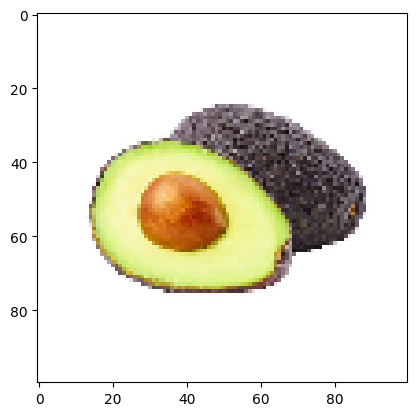

In [2]:
#cargamos la imagen
imagen = cv2.imread('imagen_referencia.jpg')
#convertimos la imagen de bgr a rgb
imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
#cambiamos el tamaño de la imagen 
imagen_rgb = cv2.resize(imagen_rgb,(100,100))
#mostramos la imagen 
plt.imshow(imagen_rgb)
plt.show()

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Conversión de la Imagen a una Matriz de Datos</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Para aplicar el algoritmo k-medias a una imagen, primero debemos convertir la imagen a un formato adecuado para el algoritmo. Este formato es una matriz donde cada fila representa un píxel y cada columna representa una característica (en este caso, los valores RGB). Además, es común convertir los valores de los píxeles a flotantes para un procesamiento más preciso.
</div>

In [3]:
#convertimos nuestra imagen en una matriz bidimensional
pixeles = imagen_rgb.reshape((-1,3))
#mostramos los primeros 5 elementos de nuestr matriz 
print(pixeles[:5])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


In [4]:
#convertimos nuestros datos a float32 para mayor precision
pixeles = np.float32(pixeles)
#mostramos como se ven los prieros 5 elementos de nuestra matriz en float32
print(pixeles[:5])

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Visualización de Datos de Colores en el Espacio RGB</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Para observar cómo están agrupados los píxeles en términos de colores, hemos creado una visualización en 3D utilizando Matplotlib. El objetivo es mostrar la distribución de los colores en el espacio RGB, donde cada eje representa una de las componentes del color: rojo, verde y azul.
</div>

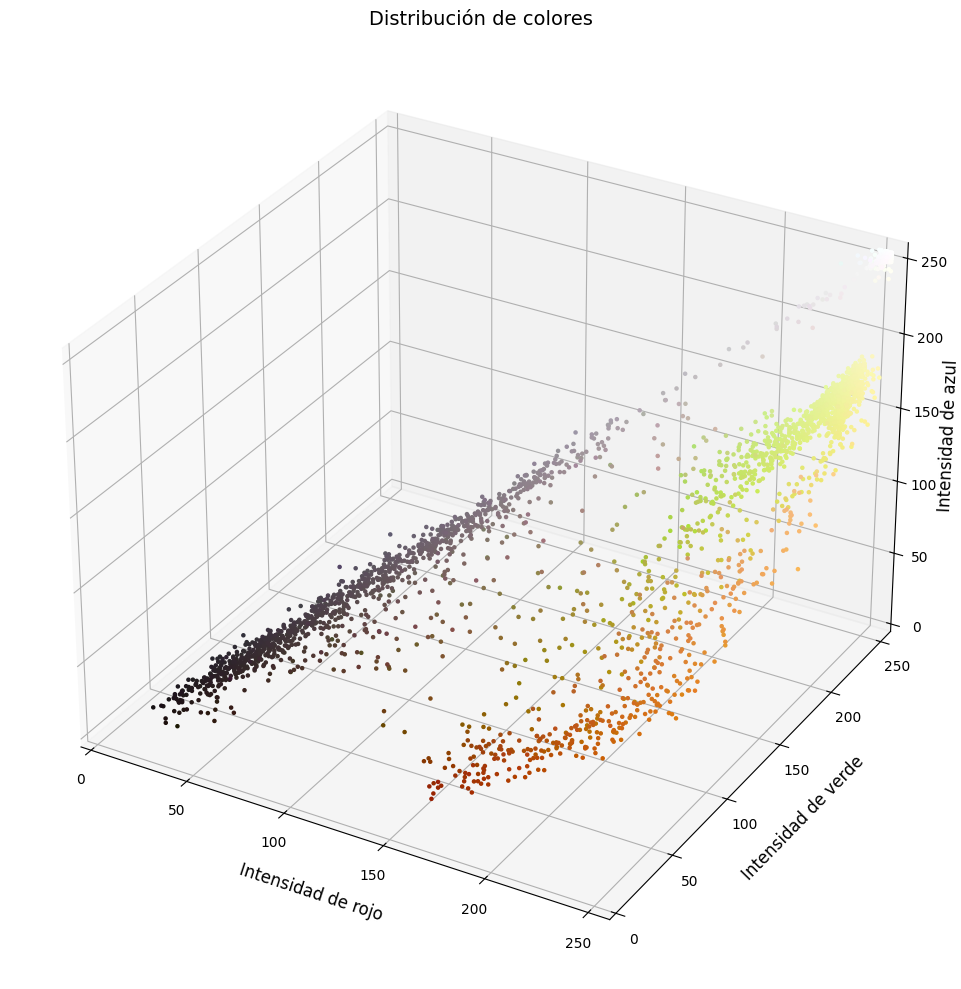

In [5]:
#importamos la libreria para hacer graficas en 3D
from mpl_toolkits.mplot3d import Axes3D

#creamos la figura que contendra al grafico
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

#colocamos algunos valores para visualizacion de nuestros datos, como que datos seran tomados, su color, forma y tamaño
scatter = ax.scatter(pixeles[:, 0], pixeles[:, 1], pixeles[:, 2], c=pixeles / 255, marker='o', s=5, alpha=1)

#colocamos etiquetas y titulo a nuestro grafico 
ax.set_xlabel('Intensidad de rojo', fontsize=12, labelpad=10)
ax.set_ylabel('Intensidad de verde', fontsize=12, labelpad=10)
ax.set_zlabel('Intensidad de azul', fontsize=12, labelpad=1)
ax.set_title('Distribución de colores', fontsize=14, pad=10)

#definimos los limites de nuestra grafica 
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)

#ajustamos y mostramos
plt.tight_layout()
plt.show()

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Aplicación del Algoritmo k-medias</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El algoritmo k-medias es un método de agrupamiento que se usa para dividir un conjunto de datos en un número específico de grupos (o clústeres). Cada grupo tiene un "centroide", que es un punto central que representa el promedio de los datos en ese grupo. El objetivo es minimizar la distancia entre los datos y su centroide correspondiente. <br>

Para aplicar el algoritmo k-medias usando scikit-learn, primero necesitamos importar la biblioteca <code>sklearn.cluster</code>, que contiene la clase <code>KMeans</code> necesaria para realizar el agrupamiento de datos. La clase <code>KMeans</code> proporciona métodos para ajustar el modelo a nuestros datos y obtener los resultados del agrupamiento.

Definimos el número de clústeres que deseamos identificar con <code>n_clusters=k</code>. En este caso, <code>k</code> es el número de grupos en los que queremos segmentar los datos de la imagen. Por ejemplo, si queremos encontrar 5 colores principales en la imagen, estableceremos <code>k</code> a 5.

Creamos una instancia del modelo <code>KMeans</code> utilizando <code>KMeans(n_clusters=k, random_state=42)</code>. Aquí, <code>n_clusters=k</code> especifica el número de clústeres deseados, y <code>random_state=42</code> garantiza que los resultados sean reproducibles al fijar una semilla para la inicialización aleatoria.

Ajustamos el modelo a los datos de la imagen utilizando el método <code>fit(datos_imagen)</code>. En esta etapa, <code>pixeles</code> es una matriz de datos con los valores de los píxeles de la imagen, convertidos a formato flotante para que el algoritmo pueda procesarlos correctamente.

Después de ajustar el modelo, obtenemos dos resultados importantes: los centroides y las etiquetas. Los centroides se obtienen con <code>kmeans.cluster_centers_</code>, que devuelve los valores promedio de los clústeres. Las etiquetas, obtenidas con <code>kmeans.labels_</code>, indican a qué clúster pertenece cada píxel.
</div>

In [6]:
from sklearn.cluster import KMeans

# Número de clústeres
k = 5

# Inicializar el modelo k-medias
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo a los datos de la imagen
kmeans.fit(pixeles)

# Obtener los centroides y las etiquetas
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

centroides = np.clip(centroides, 0, 255).astype(np.uint8)



#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Visualización de la Imagen Original y la Imagen Segmentada</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En este punto, unimos los resultados del algoritmo k-medias para reconstruir la imagen segmentada. La línea de código <code>imagen_segmentada = centroides[etiquetas].reshape(imagen_rgb.shape)</code> realiza este proceso. Primero, <code>centroides[etiquetas]</code> asigna a cada píxel el color del centroide correspondiente a su clúster, reemplazando los valores originales de los píxeles con los colores promedio encontrados. Luego, <code>reshape(imagen_rgb.shape)</code> ajusta la forma del array resultante para que coincida con las dimensiones originales de la imagen, asegurando que la imagen segmentada tenga el mismo tamaño y formato que la imagen original. Una vez terminado este proceso, mostramos tanto la imagen original como la imagen segmentada para comparar visualmente cómo ha cambiado la segmentación de colores.
</div>

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>  </div>

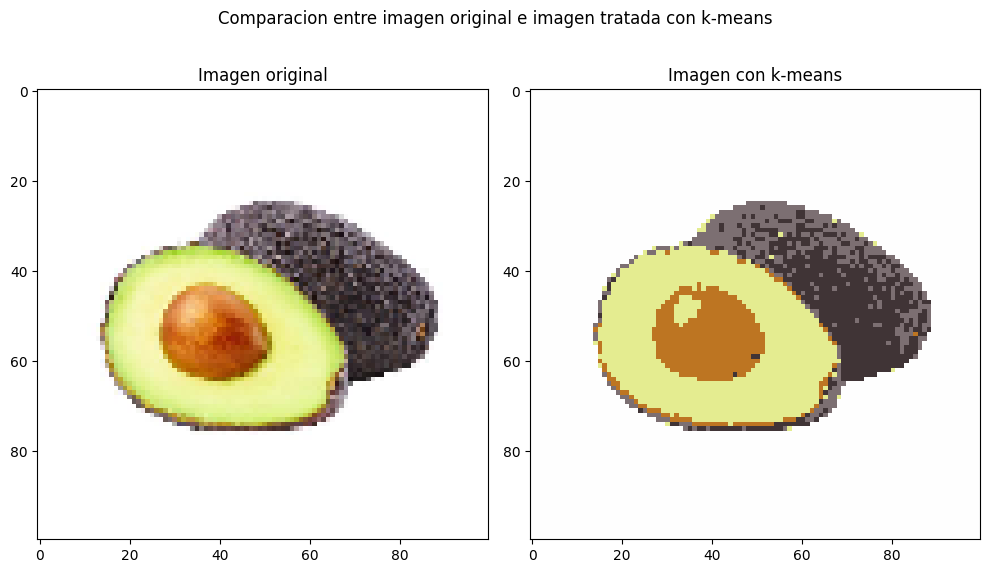

In [7]:
#recontruimos nuestra imagen 
imagen_segmentada = centroides[etiquetas].reshape(imagen_rgb.shape)

#creamos una figura
fig, axis = plt.subplots(1,2,figsize=(10,6))

#mostramos la imagen original
axis[0].imshow(imagen_rgb)
axis[0].set_title('Imagen original')

#mostramos la imagen tratada
axis[1].imshow(imagen_segmentada)
axis[1].set_title('Imagen con k-means')

#colocamos titulo ajustamos y mostramos
fig.suptitle('Comparacion entre imagen original e imagen tratada con k-means')
plt.tight_layout()
plt.show()

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Determinación del Número Óptimo de Clústeres</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Hasta el momento, hemos procesado una imagen aplicando el algoritmo k-medias para segmentar los colores en diferentes grupos. Sin embargo, una parte crucial del uso de k-medias es la elección del número de clústeres, <code>k</code>, que debemos definir antes de ejecutar el algoritmo. Elegir un valor adecuado para <code>k</code> es fundamental para obtener una segmentación significativa. Para determinar el número óptimo de clústeres, podemos utilizar varios métodos, siendo abarcados algunos a continuacion.
</div>

##### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Método del Codo</div>

<div style='text-align: justify; font-family: times-new-roman; color: #000000'>
El método del codo es una técnica utilizada para encontrar el número óptimo de clústeres en el algoritmo k-medias. La idea principal detrás de este método es calcular la suma de errores cuadrados (SSE) para diferentes valores de <code>k</code> y graficar estos valores. SSE es una medida de la variabilidad dentro de los clústeres, y un valor más bajo indica una mejor segmentación, ya que los puntos dentro de cada clúster están más cercanos al centroide del clúster.

La SSE es una métrica que mide la variabilidad dentro de cada clúster, es decir, la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano. A continuación, explico cómo calcular la SSE y cómo se utiliza en el método del codo:

La SSE se calcula como la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado. La fórmula es:

$$
\text{SSE} = \sum_{i=1}^{n} \sum_{j=1}^{k} \delta(c_{j}, x_{i})^2 
$$

donde:

- \( n \) es el número total de puntos de datos.
- \( k \) es el número de clústeres.
- \(δ(cj,xi) es la distancia entre el punto de datos \(xi\) y el centroide del clúster \(cj\).

Podemos calcular esta fórmula para diferentes valores de <code>k</code> y graficar los resultados para hallar el número óptimo de clústeres. En nuestro ejemplo, realizaremos este cálculo para un rango de 1 a 10 clústeres y observaremos la gráfica para interpretar los datos.
</div>


<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>

</div>

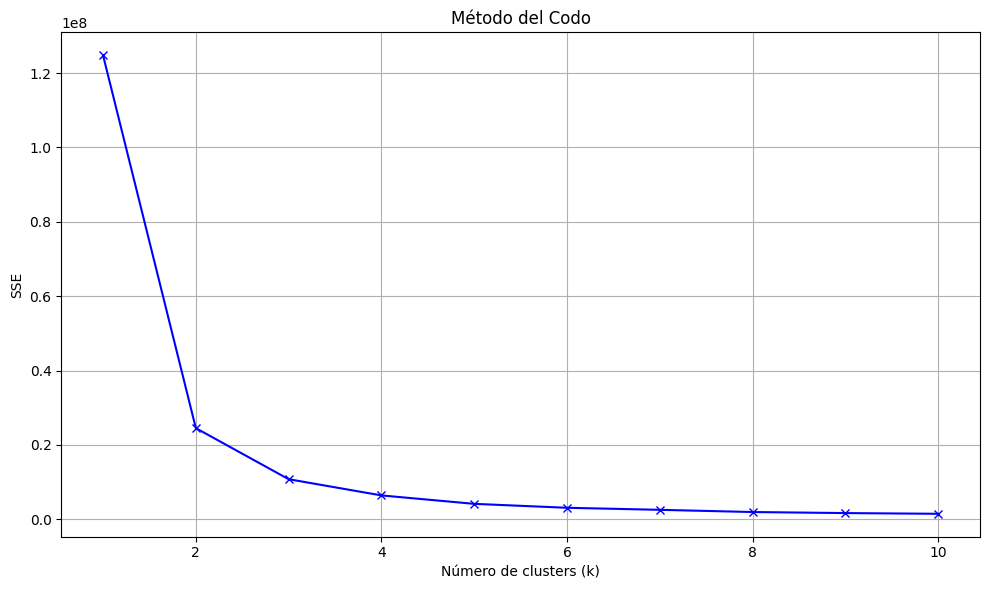

In [8]:
#creamos una lista donde guardaremos nuestros SSE de cada cluster 
sse = []

#asignamos el rango de clusters con el que trabajeremos
k_rango = range(1, 11) 

#con un bucle calculamos cada cluster y su sse
for k in k_rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixeles)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_rango, sse, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.grid('on')
plt.tight_layout()
plt.show()

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Podemos observar en la gráfica cómo se forma un codo bien definido en el número de clústeres 2, lo cual es bastante evidente. Sin embargo, también hay un codo notable en el clúster 3. Debido a que no hay una gran diferencia en la SSE al aumentar el número de clústeres más allá de 3, el número ideal de clústeres podría considerarse como 3. No obstante, es importante tener en cuenta que la elección del número de clústeres ideal puede depender de los requisitos específicos de nuestro análisis y objetivos.
</div>

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Método de la Silueta</div>

<div style='text-align: justify; font-family: times-new-roman; color: #000000'>

El método de la silueta es una técnica que ayuda a evaluar la calidad de un agrupamiento y a determinar el número óptimo de clústeres. Este método proporciona una medida cuantitativa de cuán bien cada punto de datos está agrupado en comparación con los puntos de otros clústeres. La métrica de silueta varía entre -1 y 1, donde un valor cercano a 1 indica que el punto está bien agrupado, un valor cercano a 0 indica que el punto está en el límite de dos clústeres, y un valor negativo indica que el punto puede estar mal agrupado.

Para aplicar el método de la silueta, se realiza lo siguiente:

Para cada punto de datos, se calcula el coeficiente de silueta, que se basa en dos medidas:

- <code>a(i)</code>: La distancia promedio entre el punto y todos los demás puntos en el mismo clúster. Esto mide la cohesión interna del clúster.
- <code>b(i)</code>: La distancia promedio entre el punto y todos los puntos en el clúster más cercano al que el punto no pertenece. Esto mide la separación entre clústeres.

El coeficiente de silueta para un punto se calcula como:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Donde <code>max(a(i), b(i))</code> se utiliza para normalizar el coeficiente de silueta, garantizando que el valor esté en el rango de -1 a 1.

Podemos interpretar el coeficiente de silueta de las siguientes maneras:

- Valores cercanos a 1: Indican que el punto está bien agrupado dentro de su clúster y está lejos de los clústeres vecinos.
- Valores cercanos a 0: Indican que el punto está en el límite entre dos clústeres.
- Valores negativos: Indican que el punto podría estar mal agrupado, ya que se encuentra más cerca de puntos en un clúster diferente.

Para determinar el número óptimo de clústeres, se comparan los valores de la silueta promedio para diferentes números de clústeres. El número de clústeres que maximiza la silueta promedio suele ser el más adecuado, ya que indica el mejor equilibrio entre la cohesión interna y la separación entre clústeres. Dado que se trata de una comparación de clústeres, debemos tener al menos 2 clústeres para hacer la evaluación, por lo cual nuestro rango en este caso estará definido de 2 a 10.

</div>


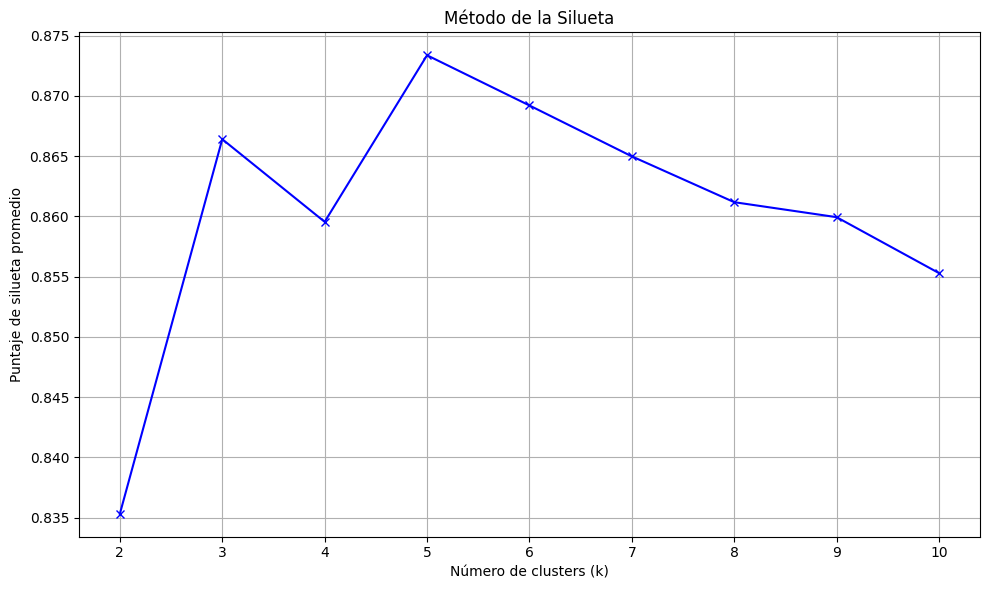

In [9]:
#importamos la libreria necesaria
from sklearn.metrics import silhouette_score

# definimos el rango, que debe empezar en 2
k_rango = range(2, 11) 

#creamos una lista para almacenar los puntos de silueta
silueta = []

#se calcula la silueta para cada cluster 
for k in k_rango:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pixeles)
    
    # Calcula el puntaje de silueta promedio
    silueta.append(silhouette_score(pixeles, cluster_labels))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_rango, silueta, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntaje de silueta promedio')
plt.title('Método de la Silueta')
plt.grid('on')
plt.tight_layout()
plt.show()


<div style='text-align: justify; font-family: times-new-roman; color: #000000'>
Tras aplicar el método de la silueta, obtuvimos una gráfica que muestra la relación entre el número de clústeres (<code>k</code>) y el puntaje de silueta promedio. El análisis de esta gráfica revela información importante sobre la estructura de nuestros datos.

La gráfica indica un claro pico en <code>k = 5</code>, donde el puntaje de silueta alcanza aproximadamente 0.874, lo que sugiere que dividir nuestros datos en 5 clústeres ofrece la mejor separación y cohesión entre los grupos. También se observa un pico secundario en <code>k = 3</code>, que podría indicar una alternativa válida, aunque menos óptima.

Es importante notar que después de <code>k = 5</code>, el puntaje de silueta disminuye gradualmente, lo que sugiere que aumentar el número de clústeres más allá de este punto no mejora significativamente la calidad del agrupamiento.

Basándonos en estos resultados, concluimos que el número óptimo de clústeres para nuestro conjunto de datos es 5. Esta configuración ofrece el mejor equilibrio entre la homogeneidad dentro de los clústeres y la heterogeneidad entre ellos. Para futuros análisis y aplicaciones, recomendamos utilizar este número de clústeres como punto de partida. Sin embargo, también es aconsejable considerar la opción de 3 clústeres si se busca un modelo más simple o si tiene sentido desde el punto de vista del dominio del problema.

</div>

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Comparacion del metodo del codo vs metodo de la silueta</div>


<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
Una vez aplicados ambos métodos, observamos algunas diferencias notorias. El método del codo sugiere que trabajar con 3 clústeres es adecuado, mientras que el método de la silueta indica que el número óptimo de clústeres es 5, proporcionando así una segmentación más detallada. La decisión sobre el número de clústeres dependerá de los objetivos específicos de nuestro análisis. Sin embargo, el método de la silueta suele ofrecer una medida más confiable y una mejor base para tomar decisiones sobre el número de clústeres.<br>

Para ilustrar cómo cambia la imagen con diferentes números de clústeres, a continuación se visualiza la imagen segmentada con clústeres que varían de 1 a 10. Esto nos permitirá observar que, a medida que aumentamos el número de clústeres, la imagen cambia menos drásticamente, lo que indica que el modelo se vuelve más detallado y menos sensible a los cambios adicionales en el número de clústeres.

</div>

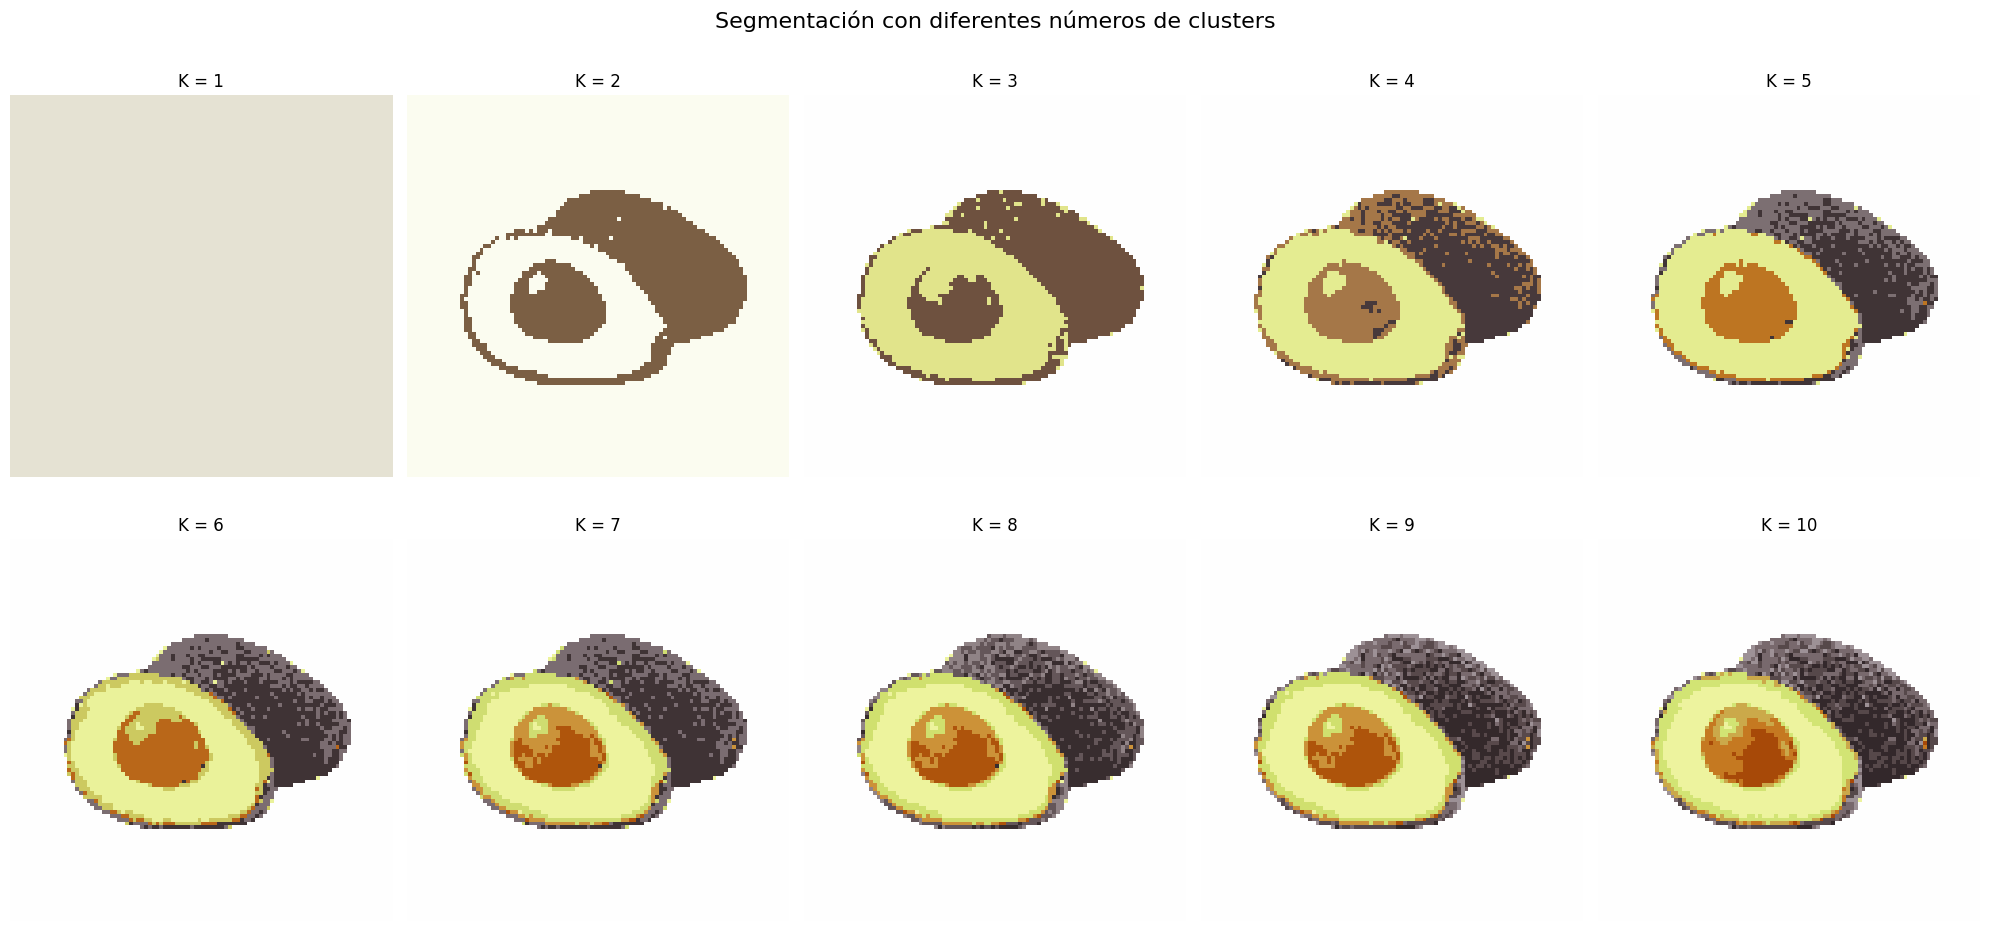

In [10]:
#creamos una figura
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Segmentación con diferentes números de clusters', fontsize=16)

uno=0
dos=0
#aplicamos k-medias con diferentes clusters en un bucle
for k in range(1, 11):
    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    etiquetas = kmeans.fit_predict(pixeles)
    
    # Reconstruir la imagen segmentada
    centroides = kmeans.cluster_centers_.astype(np.uint8)
    imagen_segmentada = centroides[etiquetas].reshape(imagen_rgb.shape)
    
    # Mostrar la imagen en el subplot correspondiente
    
    #ccondicional para pasar a la siguiente columna en la figura
    if k== 6:
        uno += 1
        dos = 0
        
    #mostramos la imagen 
    axes[uno,dos].imshow(imagen_segmentada)
    axes[uno,dos].set_title(f'K = {k}')
    axes[uno,dos].axis('off')
    
    #aumentamos la fila 
    dos +=1

plt.tight_layout()
plt.show()

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Agrupamiento Jerárquico</div>


<div style='text-align: justify; font-family: times-new-roman; color: #000000'>
El agrupamiento jerárquico es una técnica de análisis de datos utilizada para agrupar un conjunto de objetos en una jerarquía de grupos anidados. A diferencia de métodos como K-means, que requieren definir previamente el número de clústeres, el agrupamiento jerárquico genera una representación visual llamada dendrograma, la cual permite decidir el número de clústeres deseado con base en la estructura observada.<br>

Existen dos enfoques principales en el agrupamiento jerárquico:

- Agrupamiento Aglomerativo (Ascendente):
  Comienza con cada objeto en su propio clúster y, en cada paso, combina los dos clústeres más similares hasta que todos los objetos estén en un solo clúster. Es el enfoque más comúnmente utilizado y es el que abordaremos en este trabajo.

- Agrupamiento Divisivo (Descendente):
  Comienza con todos los objetos en un solo clúster y, en cada paso, divide el clúster menos homogéneo en dos, repitiendo el proceso hasta que cada objeto esté en su propio clúster.

El procedimiento para hacer un agrupamiento de este tipo es el siguiente:

1. Cálculo de distancias: Se calculan las distancias entre todos los puntos de datos utilizando una métrica de distancia (por ejemplo, distancia euclidiana). Este es el primer paso crítico, ya que determina cómo se percibe la similitud entre los puntos de datos.

2. Construcción del dendrograma:
   - Enlace: Se decide cómo medir la distancia entre dos clústeres, utilizando uno de varios métodos posibles (enlace sencillo, enlace completo, enlace promedio, etc.). Este paso determina cómo se fusionan los clústeres a medida que el proceso avanza.
   - Fusión: Los clústeres más similares se fusionan en cada iteración, formando un nuevo clúster más grande.
   - Visualización: El dendrograma se construye visualmente, mostrando las fusiones en diferentes niveles de la jerarquía.
   - Corte del dendrograma: Se decide dónde cortar el dendrograma para obtener un número deseado de clústeres. Este paso es crucial, ya que define el número final de clústeres y la segmentación de los datos.

3. Evaluación de la segmentación Después de realizar el corte, se evalúa la calidad de la segmentación utilizando diversas métricas, como el coeficiente de silueta, para determinar si los clústeres formados son coherentes.

A continuación, desarrollaremos estos pasos y se explicarán de manera más detallada.
</div>


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Cargar y Redimensionamiento de Imágenes</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En este primer paso, cargamos la imagen que hemos utilizado en el módulo anterior. Dado que trabajar con imágenes grandes puede ser costoso computacionalmente, redimensionamos la imagen a una escala más manejable, en este caso, 50x50 píxeles. Esta reducción facilita el procesamiento y optimiza el rendimiento del algoritmo.<br>

A continuación, mostramos la imagen redimensionada para observar cómo luce en la nueva escala:
</div>

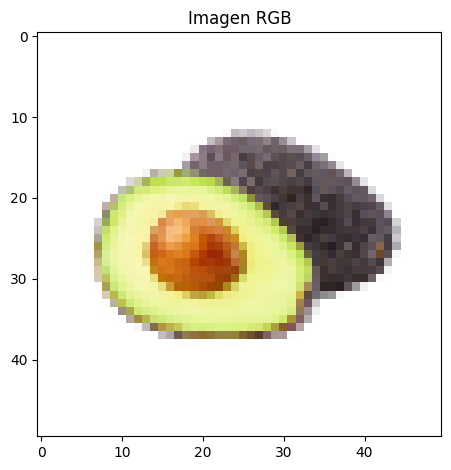

In [11]:
# redimensionamos la imagen 
imagen_rgb = cv2.resize(imagen_rgb,(50,50))

#mostramos la imagen 
plt.imshow(imagen_rgb)
plt.axis('on')
plt.title('Imagen RGB')
plt.tight_layout()
plt.show()


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Redimensionamiento y Normalización de Valores</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En este paso, transformamos la imagen redimensionada en un formato adecuado para el procesamiento de agrupamiento. Primero, convertimos la imagen redimensionada en un arreglo de píxeles. Cada píxel de la imagen se representa por sus valores RGB, por lo que utilizamos el método <code>reshape</code> para organizar estos valores en una matriz unidimensional, donde cada fila representa un píxel con tres valores (R, G, B).<br>

Luego, convertimos estos valores a tipo <code>float32</code> para mayor precisión en los cálculos posteriores. La normalización es el siguiente paso, donde dividimos los valores de los píxeles entre 255 para escalarlos a un rango de [0, 1]. Esta normalización es crucial para mejorar la precisión del clustering, ya que los valores de los píxeles deben estar en un rango uniforme.<br>

Finalmente, mostramos una muestra de los primeros valores de píxeles para verificar la correcta transformación y normalización:
</div>

In [12]:
#redimencionamos la matriz de la imagen 
pixeles = imagen_rgb.reshape((-1,3))
#convertims los valores de la matriz a tipo float32 
pixeles = np.float32(pixeles)
#normalizamos los valores de la matriz 
pixels_normalized = pixeles / 255.0
#mostramos los primeros elementos de la matriz 
print(pixeles[:5])

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Cálculo de Distancias</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En este paso, calculamos la matriz de distancias entre los puntos de datos, utilizando una métrica de distancia específica para medir la similitud entre ellos. La función utilizada para este propósito es <code>pdist</code> del módulo <code>scipy.cluster.hierarchy.</code> En este caso, empleamos la distancia euclidiana, que es una métrica común que calcula la "distancia directa" entre dos puntos en el espacio.

El código para realizar este cálculo es el siguiente:
</div>

In [13]:
#importamos la libreria nesesaria
import scipy.cluster.hierarchy as sch

# Calculamos las distancias 
distancias = sch.distance.pdist(pixeles, 'euclidean')

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Enlaces en Agrupamiento Jerárquico</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En el contexto del agrupamiento jerárquico, el "enlace" se refiere a la manera en que se mide la distancia entre dos clústeres cuando se fusionan durante el proceso de agrupamiento. Diferentes métodos de enlace afectan cómo se construye la jerarquía y, en última instancia, la estructura de los clústeres resultantes. A continuación se explican los diferentes tipos de enlace comúnmente utilizados:
</div>

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Enlace Sencillo (o Enlace de Vecino Más Cercano)</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El enlace sencillo, también conocido como enlace de vecino más cercano, calcula la distancia entre dos clústeres como la menor distancia entre cualquier par de puntos, uno en cada clúster. Esto significa que el proceso de fusión se basa en el punto más cercano entre los dos clústeres. Este método tiende a formar clústeres en forma de cadena, ya que une los clústeres que están más próximos en términos de distancia mínima. Es útil para identificar clústeres en forma de cadena o de "cadena de vecinos", pero puede ser sensible a ruido y outliers debido a su enfoque en las distancias más cortas.
</div>

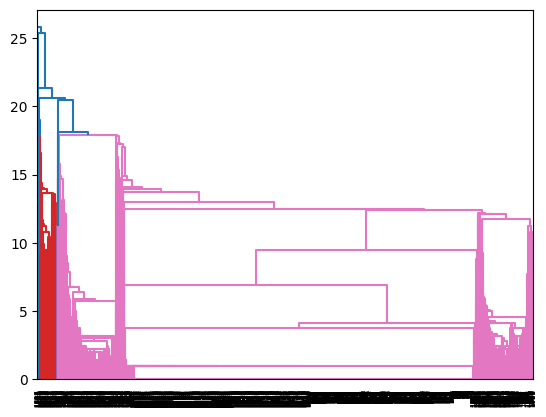

In [14]:
enlace_simple = sch.linkage(distancias, method='single')
dendrograma1 = sch.dendrogram(enlace_simple)

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Enlace Completo (o Enlace de Vecino Más Lejano)</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El enlace completo, o enlace de vecino más lejano, calcula la distancia entre dos clústeres como la mayor distancia entre puntos de diferentes clústeres. Este método se enfoca en la distancia máxima entre cualquier par de puntos, uno en cada clúster, lo que resulta en clústeres más compactos y esféricos. Al utilizar la mayor distancia, el enlace completo tiende a formar clústeres más homogéneos y puede ser más robusto frente a outliers. Sin embargo, puede ser menos sensible a la estructura global de los datos y a veces puede crear clústeres que parecen "espacios vacíos" si los datos tienen una estructura más compleja.
</div>

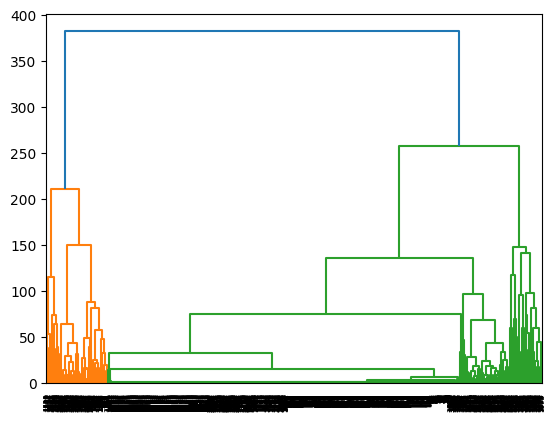

In [15]:
enlace_completo = sch.linkage(distancias,method='complete')
dendrograma2 = sch.dendrogram(enlace_completo)

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Enlace Promedio (o Enlace de Vecino Promedio)</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El enlace promedio calcula la distancia entre dos clústeres como la distancia promedio entre todos los pares de puntos, uno en cada clúster. Este método ofrece un compromiso entre el enlace sencillo y el enlace completo, promediando las distancias en lugar de tomar el mínimo o el máximo. El enlace promedio tiende a formar clústeres que balancean la cohesión interna y la separación entre clústeres, proporcionando una segmentación más equilibrada y representativa de la estructura global de los datos. Es una opción útil cuando se desea evitar los extremos de los métodos de enlace sencillo y completo.
</div>

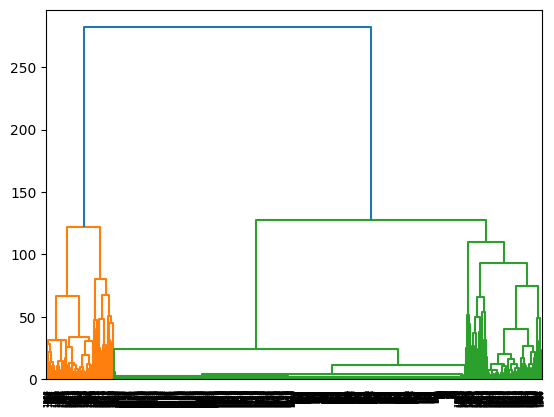

In [16]:
enlace_promedio = sch.linkage(distancias,method='average')
dendrograma3 = sch.dendrogram(enlace_promedio)

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Enlace de Ward</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
El enlace de Ward minimiza la suma de las distancias cuadráticas dentro de los clústeres. Es decir, al unir dos clústeres, se elige la fusión que resulta en la menor suma de varianzas dentro de los clústeres combinados. Este método tiende a formar clústeres con la menor varianza interna posible y suele crear clústeres más homogéneos. El enlace de Ward es ideal para situaciones en las que se desea una segmentación que minimice la varianza interna y proporcione clústeres que sean internamente coherentes, resultando en una estructura de clústeres más compacta y uniforme.
</div>

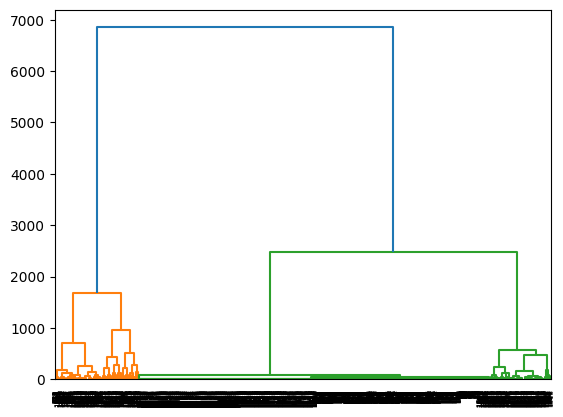

In [17]:
enlace_ward = sch.linkage(distancias,method='ward')
dendrograma4 = sch.dendrogram(enlace_ward)

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Selección de la Distancia de Corte y Segmentación Final</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En este paso, se realiza la segmentación final de la imagen utilizando el valor de distancia de corte seleccionado. Esta distancia define el umbral para determinar cuántos clústeres se formarán al cortar el dendrograma. Utilizando el método <codefcluster</code> de la biblioteca <code>scipy</code>, cada uno de los diferentes métodos de enlace (sencillo, completo, promedio y Ward) es aplicado para segmentar la imagen.<br>

Se establece un valor de distancia <code>(max_d)</code> que actúa como umbral para cortar el dendrograma y definir los clústeres. En este caso, se ha elegido un valor arbitrario, el cual podemos modificar dependiendo el enlace usado y el numero de clusters que deseemos tener.<br>

Para cada método de enlace, la segmentación se realiza mediante la función <code>fcluster</code>, que asigna a cada píxel un número de clúster basado en la distancia de corte. Posteriormente, se reconfigura la imagen segmentada para que tenga la misma forma que la imagen original, permitiendo comparar visualmente cómo cada método de enlace segmenta la imagen en función de la distancia de corte elegida.
</div>

In [18]:
#importamos la libreria necesaria
from scipy.cluster.hierarchy import fcluster

#definimos un cluster o distancia de corte 
max_d = 100

#enlace simple
simple = fcluster(enlace_simple,max_d,criterion='distance')
imagen_segmentada_simple = simple.reshape(imagen_rgb.shape[:2])
#enlace completo
completo = fcluster(enlace_completo, max_d, criterion='distance')
imagen_segmentada_completo = completo.reshape(imagen_rgb.shape[:2])
#enlace promedio 
promedio =fcluster(enlace_promedio,max_d,criterion='distance')
imagen_segmentada_promedio = promedio.reshape(imagen_rgb.shape[:2])
#enlace ward
ward = fcluster(enlace_ward,max_d,criterion='distance')
imagen_segmentada_ward = ward.reshape(imagen_rgb.shape[:2])

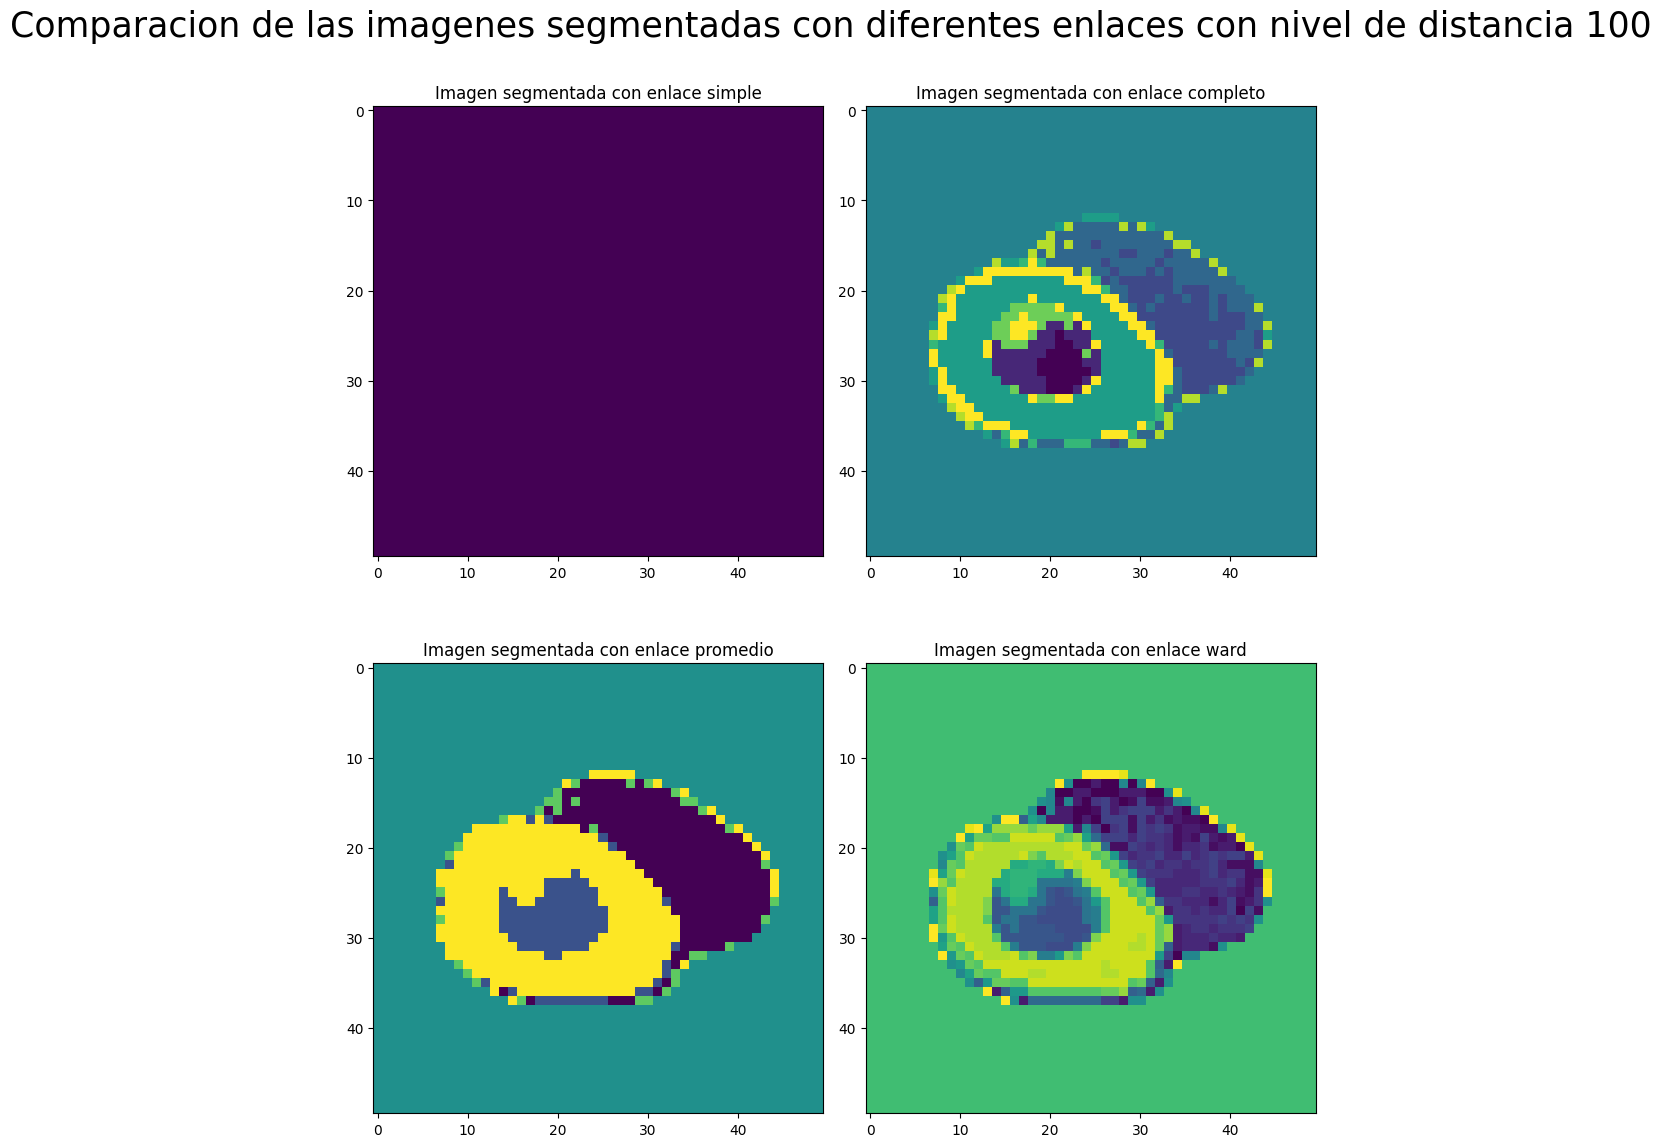

In [20]:
fig , axis = plt.subplots(2,2,figsize=(10,12))

#mostramos las imagenes 
axis[0,0].imshow(imagen_segmentada_simple)
axis[0,1].imshow(imagen_segmentada_completo)
axis[1,0].imshow(imagen_segmentada_promedio)
axis[1,1].imshow(imagen_segmentada_ward)

#agregamos titulo a cada imagen 
axis[0,0].set_title('Imagen segmentada con enlace simple')
axis[0,1].set_title('Imagen segmentada con enlace completo')
axis[1,0].set_title('Imagen segmentada con enlace promedio')
axis[1,1].set_title('Imagen segmentada con enlace ward')

plt.suptitle(f'Comparacion de las imagenes segmentadas con diferentes enlaces con nivel de distancia {max_d}',fontsize=25)

plt.tight_layout()
plt.show()

#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Evaluación de Clústeres: Coeficiente Cophenético</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En esta etapa, evaluamos la calidad de la segmentación obtenida utilizando el coeficiente cophenético. Este coeficiente mide la correlación entre las distancias observadas en el dendrograma y las distancias esperadas, proporcionando una indicación de cuán bien el dendrograma refleja las distancias originales entre los puntos de datos.<br>

Utilizamos la función cophenet del módulo <code>scipy.cluster.hierarchy</code> para calcular el coeficiente cophenético. Esta función evalúa la precisión del dendrograma comparando las distancias en el dendrograma con las distancias reales calculadas.<br>

El coeficiente cophenético se imprime para cada método, proporcionando un valor que puede utilizarse para comparar y seleccionar el método de enlace más adecuado en función de la calidad del agrupamiento. Un coeficiente cophenético más alto indica una mejor correspondencia entre el dendrograma y las distancias originales, sugiriendo que el método de enlace ha realizado una segmentación más precisa.
</div>

In [26]:
#importamos la libreria necesaria
from scipy.cluster.hierarchy import cophenet

# Calculamos el coeficiente cophenético
#enlace simple
c, coph_dists = cophenet(enlace_simple, distancias)
print(f"Coeficiente cophenético en enlace simple: {c}")

#enlace completo
c, coph_dists = cophenet(enlace_completo, distancias)
print(f"Coeficiente cophenético en enlace completo: {c}")

#enlace promedio
c, coph_dists = cophenet(enlace_promedio, distancias)
print(f"Coeficiente cophenético en enlace promedio: {c}")

#enlace ward
c, coph_dists = cophenet(enlace_ward, distancias)
print(f"Coeficiente cophenético en enlace ward: {c}")

Coeficiente cophenético en enlace simple: 0.7556513776499064
Coeficiente cophenético en enlace completo: 0.9635832469558178
Coeficiente cophenético en enlace promedio: 0.959149359641523
Coeficiente cophenético en enlace ward: 0.9455683799154978


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Evaluación de Clústeres: Índice de Silhouette</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En esta etapa, evaluamos la calidad de los clústeres obtenidos utilizando el índice de Silhouette. Este índice mide la coherencia y separación de los clústeres formados, proporcionando una medida cuantitativa de cuán bien se ha realizado la segmentación.<br>

El índice de Silhouette promedio se imprime para cada método de enlace, proporcionando una medida cuantitativa para comparar la calidad de los clústeres formados. Un valor promedio más alto indica una mejor calidad de los clústeres, sugiriendo que el método de enlace ha realizado una segmentación más adecuada.
</div>

In [31]:
# Calcula el índice de Silhouette
#silhouette_avg = silhouette_score(pixeles, simple)
#print(f"Índice de Silhouette promedio enlace simple: {silhouette_avg}")

silhouette_avg = silhouette_score(pixeles, completo)
print(f"Índice de Silhouette promedio enlace completo: {silhouette_avg}")

silhouette_avg = silhouette_score(pixeles, promedio)
print(f"Índice de Silhouette promedio enlace promedio: {silhouette_avg}")

silhouette_avg = silhouette_score(pixeles, ward)
print(f"Índice de Silhouette promedio enlace ward: {silhouette_avg}")

Índice de Silhouette promedio enlace completo: 0.8471404314041138
Índice de Silhouette promedio enlace promedio: 0.8446064591407776
Índice de Silhouette promedio enlace ward: 0.8228071331977844


#### <div style= 'font-family: times-new-roman; color: #000000;text-align:center;'>Evaluación de Clústeres: Índice de Calinski-Harabasz</div>

<div style= 'text-align: justify; font-family: times-new-roman; color: #000000'>
En esta sección, se evalúa la calidad de los clústeres generados mediante el índice de Calinski-Harabasz. Este índice, también conocido como el índice de la varianza de clústeres, mide la dispersión interna de los clústeres y la separación entre ellos. Es una métrica útil para evaluar qué tan bien definidos están los clústeres.<br>

El índice de Calinski-Harabasz se imprime para cada método de enlace, proporcionando una medida cuantitativa adicional para comparar la calidad de los clústeres. Un valor más alto indica una mejor calidad de los clústeres, facilitando la selección del método de enlace más adecuado para el análisis de los datos.
</div>

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcula el índice de Calinski-Harabasz
#ch_score = calinski_harabasz_score(pixeles, simple)
#print(f"Índice de Calinski-Harabasz en enlace simple: {ch_score}")

ch_score = calinski_harabasz_score(pixeles, completo)
print(f"Índice de Calinski-Harabasz en enlace completo: {ch_score}")

ch_score = calinski_harabasz_score(pixeles, promedio)
print(f"Índice de Calinski-Harabasz en enlace promedio: {ch_score}")

ch_score = calinski_harabasz_score(pixeles, ward)
print(f"Índice de Calinski-Harabasz en enlace ward: {ch_score}")

Índice de Calinski-Harabasz en enlace completo: 16117.656051666958
Índice de Calinski-Harabasz en enlace promedio: 12655.012847750322
Índice de Calinski-Harabasz en enlace ward: 23892.27779068348


agrupacion espectral 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from skimage import io, color


image_rgb = color.rgba2rgb(imagen_rgb) if imagen_rgb.shape[2] == 4 else imagen_rgb
image_lab = color.rgb2lab(image_rgb)

# Reshape la imagen para que cada píxel sea una fila
pixels = image_lab.reshape(-1, 3)

# Calcular la matriz de similitud usando el kernel RBF
similarity_matrix = rbf_kernel(pixels)

# Aplicar agrupamiento espectral
n_clusters = 5  # Número de clusters deseados
spectral = SpectralClustering(n_clusters=n_clusters, 
                              affinity='precomputed', 
                              random_state=42)
labels = spectral.fit_predict(similarity_matrix)

# Reshape los labels para que coincidan con la forma de la imagen original
segmented = labels.reshape(imagen_rgb.shape[:2])

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented, cmap='viridis')
plt.title('Imagen Segmentada')
plt.axis('off')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 